# UML

In [1]:
import iplantuml

### State Machine UML

In [ ]:
%%plantuml

@startuml

state Unlocked {
    
    [*] -> Disconnected
    
    Unlocked : <b>pbNewContact</b> enabled <b>true</b>
    Unlocked : <b>pbSend</b> enabled <b>true</b>
    Unlocked : <b>pbAttachFile</b> enabled <b>true</b>
    Unlocked : <b>lwContacts</b> enabled <b>true</b>
    Unlocked : <b>teSend</b> enabled <b>true</b>
    Unlocked : <b>lbAttachFile</b> enabled <b>true</b>
    Unlocked : <b>pbDeleteContact</b> enabled <b>false</b>
    Unlocked : <b>pbEditContact</b> enabled <b>false</b>
    
    state Disconnected {
    
        Disconnected : <b>pbNewContact</b> enabled <b>true</b>
        Disconnected : <b>pbSend</b> enabled <b>false</b>
        Disconnected : <b>pbAttachFile</b> enabled <b>false</b>
        Disconnected : <b>lwContacts</b> enabled <b>true</b>
        Disconnected : <b>teSend</b> enabled <b>false</b>
        Disconnected : <b>lbAttachFile</b> enabled <b>false</b>
        Disconnected : <b>pbDeleteContact</b> enabled <b>false</b>
        Disconnected : <b>pbEditContact</b> enabled <b>false</b>
    }
    
    state Connected {
        
        Connected : <b>pbNewContact</b> enabled <b>true</b>
        Connected : <b>pbSend</b> enabled <b>false</b>
        Connected : <b>pbAttachFile</b> enabled <b>true</b>
        Connected : <b>lwContacts</b> enabled <b>true</b>
        Connected : <b>teSend</b> enabled <b>true</b>
        Connected : <b>lbAttachFile</b> enabled <b>true</b>
        Connected : <b>pbDeleteContact</b> enabled <b>false</b>
        Connected : <b>pbEditContact</b> enabled <b>false</b>
    }
    
    state ValidateSendable {
    
        ValidateSendable: <b>state</b> entered() -> <b>this</b> on_validateSendable()
    }
    
    state Sendable {
    
        Sendable : <b>pbNewContact</b> enabled <b>true</b>
        Sendable : <b>pbSend</b> enabled <b>true</b>
        Sendable : <b>pbAttachFile</b> enabled <b>true</b>
        Sendable : <b>lwContacts</b> enabled <b>true</b>
        Sendable : <b>teSend</b> enabled <b>true</b>
        Sendable : <b>lbAttachFile</b> enabled <b>true</b>
        Sendable : <b>pbDeleteContact</b> enabled <b>false</b>
        Sendable : <b>pbEditContact</b> enabled <b>false</b>
    }
    
    note top of ValidateSendable
        - checks if message is non empty (contains text and/or file)
        - unlocks pbSend only if above is true
    end note
    
    Locked -up-> [H] : <b>this</b> contactAdded()
    Locked -up-> [H] : <b>this</b> contactAdditionCanceled()
    Locked -up-> [H] : <b>this</b> errorCatched()
    
    Disconnected -down-> Connected : <b>this</b> contactConnected()
    
    Connected -up-> Disconnected : <b>this</b> contactDisconnected()
    Connected -right-> ValidateSendable : <b>teSend</b> textChanged()
    Connected -right-> ValidateSendable : <b>this</b> fileChanged()
    
    ValidateSendable -down-> Sendable : <b>this</b> msgSendable()
    ValidateSendable -left-> Connected : <b>this</b> msgUnsendable()
    
    Sendable -up-> ValidateSendable : <b>this</b> fileChanged()
    Sendable -up-> ValidateSendable : <b>teSend</b> textChanged()
}

state Locked {

    Locked : <b>pbNewContact</b> enabled <b>false</b>
    Locked : <b>pbSend</b> enabled <b>false</b>
    Locked : <b>pbAttachFile</b> enabled <b>false</b>
    Locked : <b>lwContacts</b> enabled <b>false</b>
    Locked : <b>teSend</b> enabled <b>false</b>
    Locked : <b>lbAttachFile</b> enabled <b>false</b>
    Locked : <b>pbDeleteContact</b> enabled <b>false</b>
    Locked : <b>pbEditContact</b> enabled <b>false</b>
}

[*] --> Unlocked
Unlocked -down-> Locked : <b>pbNewContact</b> clicked()
Unlocked -down-> Locked : <b>this</b> error(QString)


@enduml

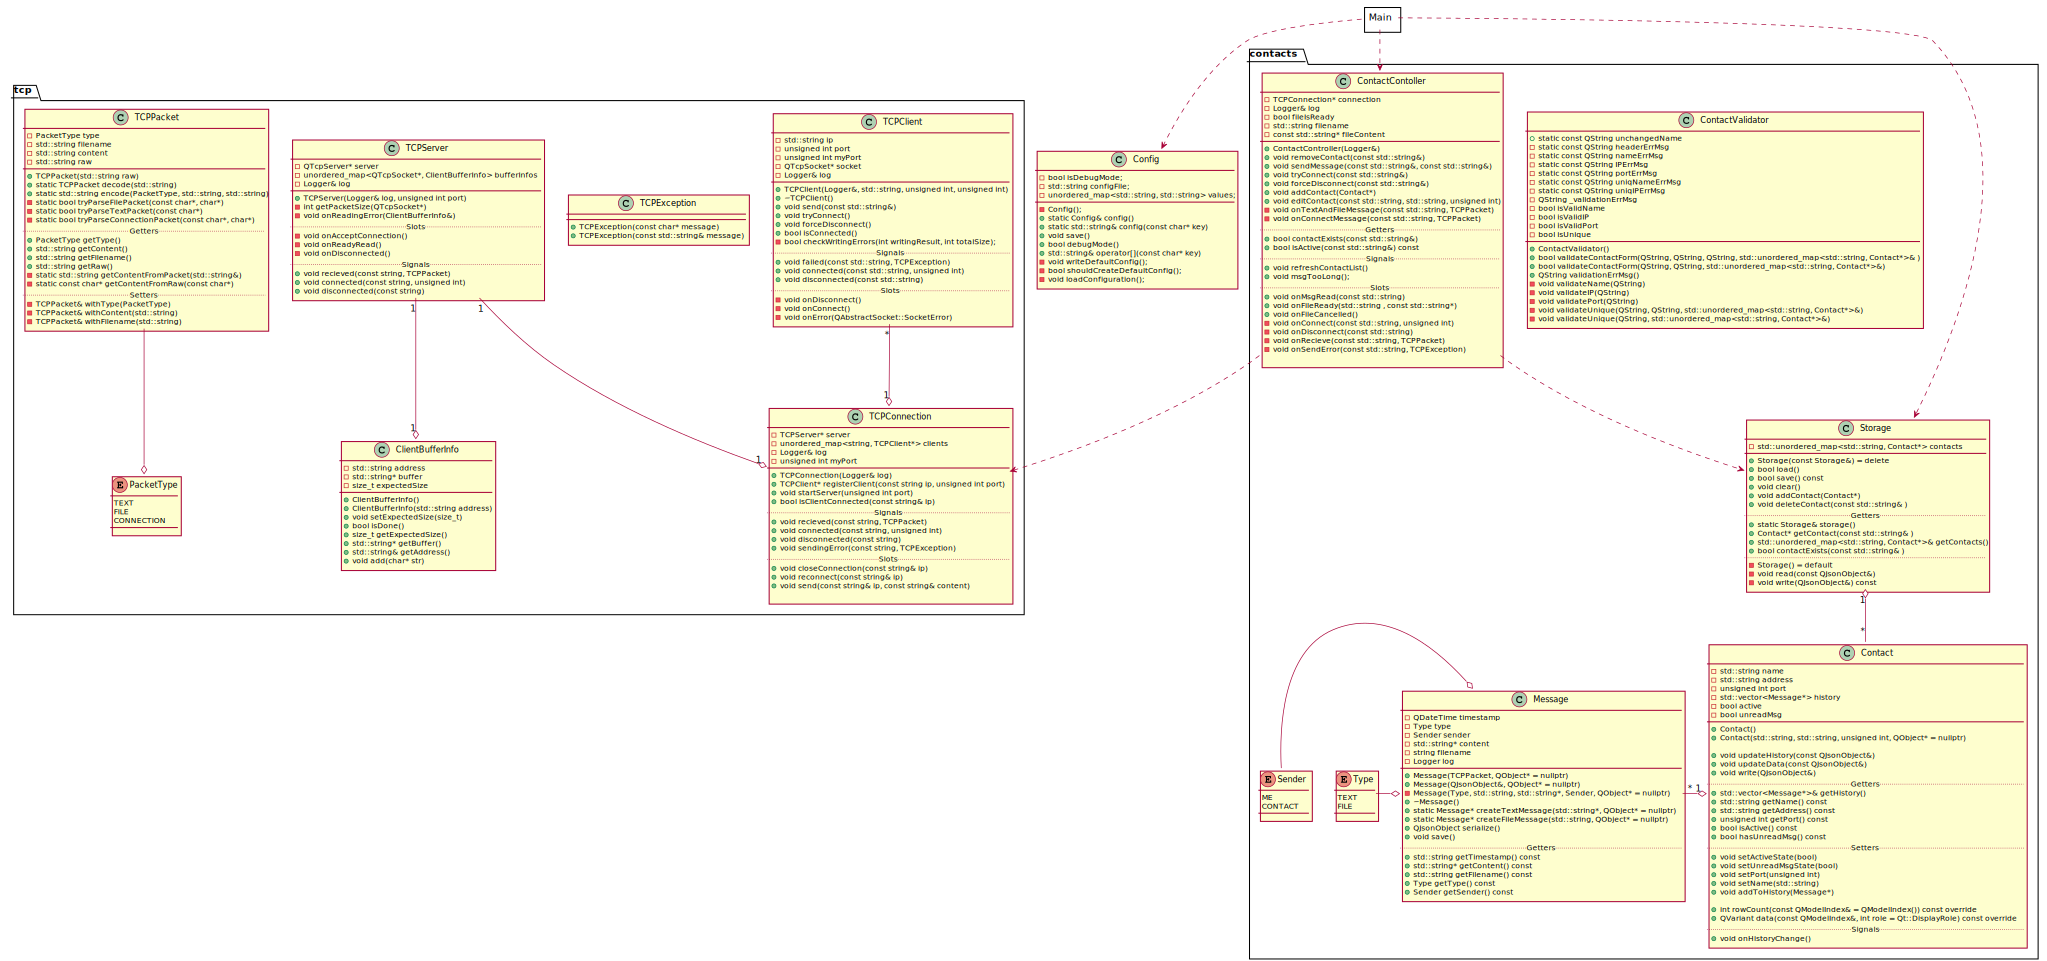

In [3]:
%%plantuml

@startuml 

namespace contacts {


class Storage {
    -{field} std::unordered_map<std::string, Contact*> contacts
    ___
    +Storage(const Storage&) = delete
    +bool load()
    +bool save() const
    +void clear()
    +void addContact(Contact*)
    +void deleteContact(const std::string& )
    .. Getters ..
    +static Storage& storage()
    +Contact* getContact(const std::string& )
    +std::unordered_map<std::string, Contact*>& getContacts()
    +bool contactExists(const std::string& )
    ....
    -Storage() = default
    -void read(const QJsonObject&)
    -void write(QJsonObject&) const
}

class ContactValidator{
    +static const QString unchangedName
    -static const QString headerErrMsg
    -static const QString nameErrMsg
    -static const QString IPErrMsg
    -static const QString portErrMsg
    -static const QString uniqNameErrMsg
    -static const QString uniqIPErrMsg
    -QString _validationErrMsg
    -bool isValidName
    -bool isValidIP
    -bool isValidPort
    -bool isUnique
    ___
    +ContactValidator()
    +bool validateContactForm(QString, QString, QString, std::unordered_map<std::string, Contact*>& )
    +bool validateContactForm(QString, QString, std::unordered_map<std::string, Contact*>&)
    +QString validationErrMsg()
    -void validateName(QString)
    -void validateIP(QString)
    -void validatePort(QString)
    -void validateUnique(QString, QString, std::unordered_map<std::string, Contact*>&)
    -void validateUnique(QString, std::unordered_map<std::string, Contact*>&)
}

class Contact{
    -std::string name
    -std::string address
    -unsigned int port
    -std::vector<Message*> history
    -bool active
    -bool unreadMsg
    ____
    +Contact()
    +Contact(std::string, std::string, unsigned int, QObject* = nullptr)

    +void updateHistory(const QJsonObject&)
    +void updateData(const QJsonObject&)
    +void write(QJsonObject&)
    .. Getters ..
    +std::vector<Message*>& getHistory()
    +std::string getName() const
    +std::string getAddress() const
    +unsigned int getPort() const
    +bool isActive() const
    +bool hasUnreadMsg() const
    .. Setters ..
    +void setActiveState(bool)
    +void setUnreadMsgState(bool)
    +void setPort(unsigned int)
    +void setName(std::string)
    +void addToHistory(Message*)

    +int rowCount(const QModelIndex& = QModelIndex()) const override
    +QVariant data(const QModelIndex&, int role = Qt::DisplayRole) const override
    .. Signals ..
    +void onHistoryChange()
}

enum Type{
    TEXT
    FILE
}

enum Sender{
    ME
    CONTACT
}

class ContactContoller{
    -TCPConnection* connection
    -Logger& log
    -bool fileIsReady
    -std::string filename
    -const std::string* fileContent
    ____
    +ContactController(Logger&)
    +void removeContact(const std::string&)
    +void sendMessage(const std::string&, const std::string&)
    +void tryConnect(const std::string&)
    +void forceDisconnect(const std::string&)
    +void addContact(Contact*)
    +void editContact(const std::string, std::string, unsigned int)
    -void onTextAndFileMessage(const std::string, TCPPacket)
    -void onConnectMessage(const std::string, TCPPacket)
    .. Getters ..
    +bool contactExists(const std::string&)
    +bool isActive(const std::string&) const
    .. Signals ..
    +void refreshContactList()
    +void msgTooLong();
    .. Slots ..
    +void onMsgRead(const std::string)
    +void onFileReady(std::string , const std::string*)
    +void onFileCancelled()
    -void onConnect(const std::string, unsigned int)
    -void onDisconnect(const std::string)
    -void onRecieve(const std::string, TCPPacket)
    -void onSendError(const std::string, TCPException)

}

class Message{
    -QDateTime timestamp
    -Type type
    -Sender sender
    -std::string* content
    -string filename
    -Logger log
    ___
    +Message(TCPPacket, QObject* = nullptr)
    +Message(QJsonObject&, QObject* = nullptr)
    -Message(Type, std::string, std::string*, Sender, QObject* = nullptr)
    +~Message()
    +static Message* createTextMessage(std::string*, QObject* = nullptr)
    +static Message* createFileMessage(std::string, QObject* = nullptr)
    +QJsonObject serialize()
    +void save()
    .. Getters ..
    +std::string getTimestamp() const
    +std::string* getContent() const
    +std::string getFilename() const 
    +Type getType() const
    +Sender getSender() const   
}

    Contact "*" -up-o "1" Storage  
    Message "*" -o "1" Contact

    Type -right-o Message  
    Sender -right-o Message  

    ContactContoller ..> Storage
}

namespace tcp{

    class TCPClient{
        -std::string ip
        -unsigned int port
        -unsigned int myPort
        -QTcpSocket* socket
        -Logger& log
        ____
        +TCPClient(Logger&, std::string, unsigned int, unsigned int)
        +~TCPClient()
        +void send(const std::string&)
        +void tryConnect()
        +void forceDisconnect()
        +bool isConnected()
        -bool checkWritingErrors(int writingResult, int totalSize);
        .. Signals ..
        +void failed(const std::string, TCPException)
        +void connected(const std::string, unsigned int)
        +void disconnected(const std::string)
        .. Slots ..
        -void onDisconnect()
        -void onConnect()
        -void onError(QAbstractSocket::SocketError)
    }

    class TCPException{
        +TCPException(const char* message)
        +TCPException(const std::string& message)
    }

    enum PacketType {
        TEXT
        FILE 
        CONNECTION
    }

    class TCPPacket {
        -PacketType type
        -std::string filename
        -std::string content
        -std::string raw
        ____
        +TCPPacket(std::string raw)
        +static TCPPacket decode(std::string)
        +static std::string encode(PacketType, std::string, std::string)
        -static bool tryParseFilePacket(const char*, char*)
        -static bool tryParseTextPacket(const char*)
        -static bool tryParseConnectionPacket(const char*, char*)
        .. Getters ..
        +PacketType getType()
        +std::string getContent()
        +std::string getFilename() 
        +std::string getRaw()
        -static std::string getContentFromPacket(std::string&)
        -static const char* getContentFromRaw(const char*)
        .. Setters ..
        -TCPPacket& withType(PacketType)
        -TCPPacket& withContent(std::string)
        -TCPPacket& withFilename(std::string)
    }
  
    class TCPConnection{
        -TCPServer* server
        -unordered_map<string, TCPClient*> clients
        -Logger& log
        -unsigned int myPort
        ____
        +TCPConnection(Logger& log) 
        +TCPClient* registerClient(const string ip, unsigned int port)
        +void startServer(unsigned int port)
        +bool isClientConnected(const string& ip)
        .. Signals ..
        +void recieved(const string, TCPPacket)
        +void connected(const string, unsigned int)
        +void disconnected(const string)
        +void sendingError(const string, TCPException)
        .. Slots ..
        +void closeConnection(const string& ip)
        +void reconnect(const string& ip)
        +void send(const string& ip, const string& content)

    }

    class TCPServer{
        -QTcpServer* server
        -unordered_map<QTcpSocket*, ClientBufferInfo> bufferInfos
        -Logger& log
        ____
        +TCPServer(Logger& log, unsigned int port)
        -int getPacketSize(QTcpSocket*)
        -void onReadingError(ClientBufferInfo&)
        .. Slots ..
        -void onAcceptConnection()
        -void onReadyRead()
        -void onDisconnected()
        .. Signals ..
        +void recieved(const string, TCPPacket)
        +void connected(const string, unsigned int)
        +void disconnected(const string)
    }

    class ClientBufferInfo {
        -std::string address
        -std::string* buffer
        -size_t expectedSize
        ____
        +ClientBufferInfo()
        +ClientBufferInfo(std::string address)
        +void setExpectedSize(size_t)
        +bool isDone()
        +size_t getExpectedSize()
        +std::string* getBuffer()
        +std::string& getAddress()
        +void add(char* str)
    }

    TCPServer "1" --o "1" TCPConnection 
    TCPClient "*" --o "1" TCPConnection 
    TCPPacket --o PacketType
    TCPServer "1" --o "1" ClientBufferInfo
}
 

class Config{
    -bool isDebugMode;
    -std::string configFile;
    -unordered_map<std::string, std::string> values;
    ____
    -Config();
    +static Config& config()
    +static std::string& config(const char* key)
    +void save()
    +bool debugMode()
    +std::string& operator[](const char* key)
    -void writeDefaultConfig();
    -bool shouldCreateDefaultConfig();
    -void loadConfiguration();
}

package Main <<rectangle>>{    
}

contacts.ContactContoller ..> tcp.TCPConnection


Main ..> Config
Main ..> contacts.ContactContoller
Main ..> contacts.Storage

@enduml